# 🎯 Project 6: Titanic – Machine Learning from Disaster

## Define

In this project, we aim to build a machine learning model that predicts whether a passenger survived the Titanic disaster based on features such as age, gender, class, and more.

### Problem Type:
This is a **binary classification** problem, where the target variable is:
- `Survived`:
  - 0 = Did not survive  
  - 1 = Survived

### Objective:
To analyze passenger data and train a supervised machine learning model that accurately predicts survival outcomes. The goal is to:
- Understand key survival factors.
- Test different classification algorithms.
- Optimize performance using proper evaluation metrics.


## 2. Prepare — Load and Inspect Data

We begin by loading the training and test datasets. Our first goal is to understand the structure of the data, check for missing values, and identify data types.

- The training dataset contains passenger details and the `Survived` label.
- The test dataset contains similar information without the label, used for predictions.

Key checks:
- Dataset dimensions
- Column types
- Null values (missing data)


In [15]:
#Import libraries
import google.colab
from google.colab import drive
drive.mount('/content/drive')
train_path="/content/drive/MyDrive/ml_engineer/p5_Survival_insights_Ml_Clasification/train.csv"
test_path="/content/drive/MyDrive/ml_engineer/p5_Survival_insights_Ml_Clasification/test.csv"
# 📚 Import basic libraries
import pandas as pd
import numpy as np

# 📂 Load datasets (asegúrate de haber subido los archivos)
train = pd.read_csv(train_path) # Use train_path instead of 'train.csv'
test = pd.read_csv(test_path)  # Use test_path instead of 'test.csv'

# 🧾 Preview first rows
print("🔍 Train set preview:")
display(train.head())

print("\n📊 Test set preview:")
display(test.head())

# 📐 Shape of datasets
print(f"\n✅ Train shape: {train.shape}")
print(f"✅ Test shape: {test.shape}")

# 🧠 General info
print("\n📋 Train info:")
train.info()

# 🔎 Missing values
print("\n🧼 Missing values in training set:")
print(train.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Train set preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📊 Test set preview:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



✅ Train shape: (891, 12)
✅ Test shape: (418, 11)

📋 Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

🧼 Missing values in training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch      

## 🧾 Data Overview (Prepare)

The dataset contains information for **891 passengers** across **12 features**, including:
- **Categorical**: `Sex`, `Embarked`, `Cabin`, `Pclass`
- **Numerical**: `Age`, `Fare`, `SibSp`, `Parch`

### 🔍 Observations:
- `Age`: 177 missing values (~20%) — requires imputation
- `Cabin`: 687 missing values — likely to be dropped
- `Embarked`: 2 missing values — will be filled with mode
- No duplicates found
- Test dataset contains similar structure but **no "Survived" label** (target)

We will now explore distributions, correlations and patterns between features and survival status.


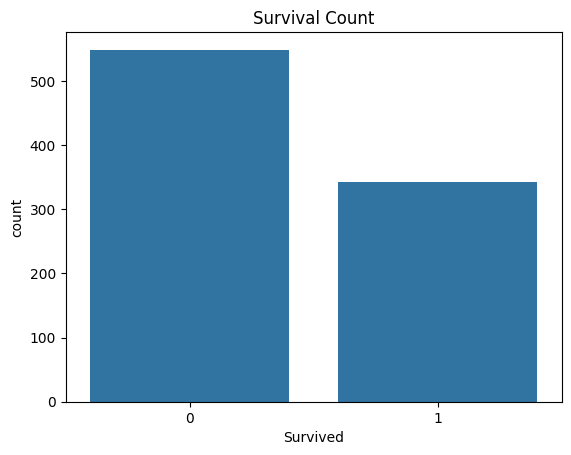

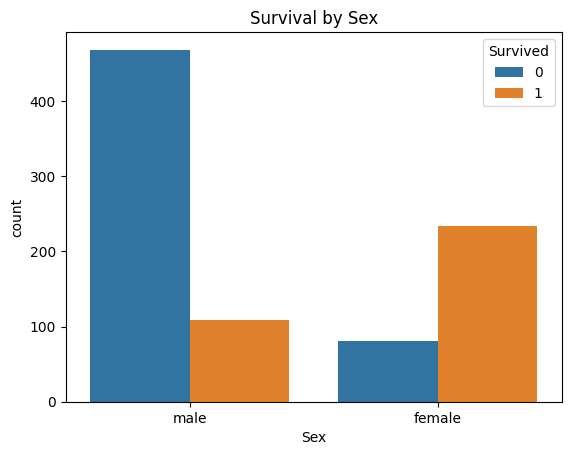

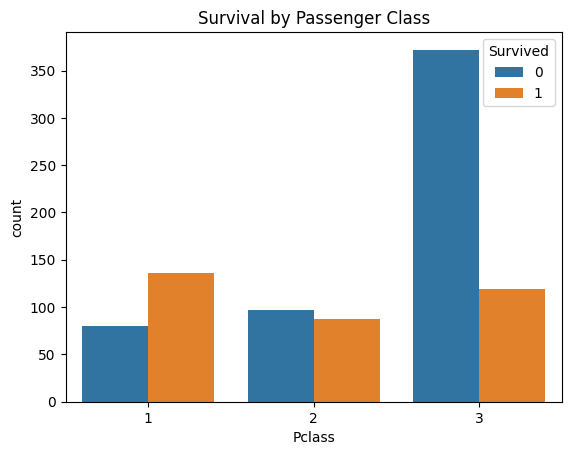

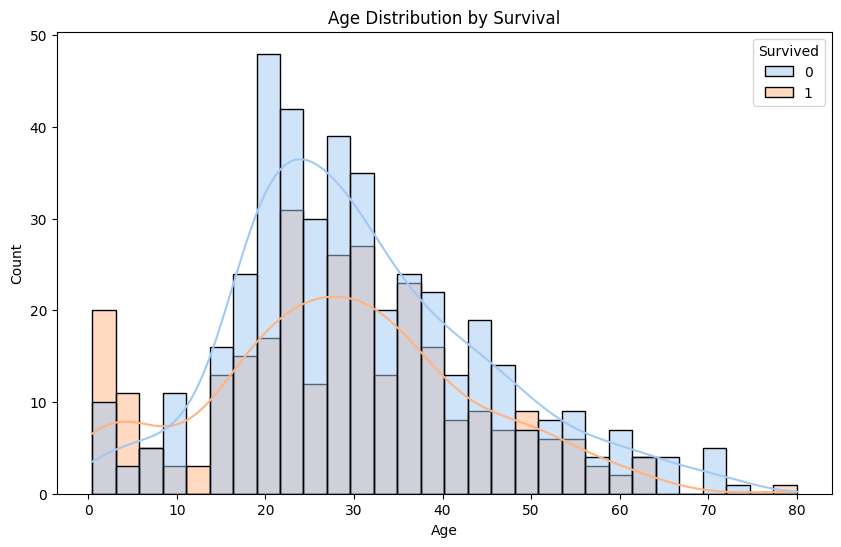

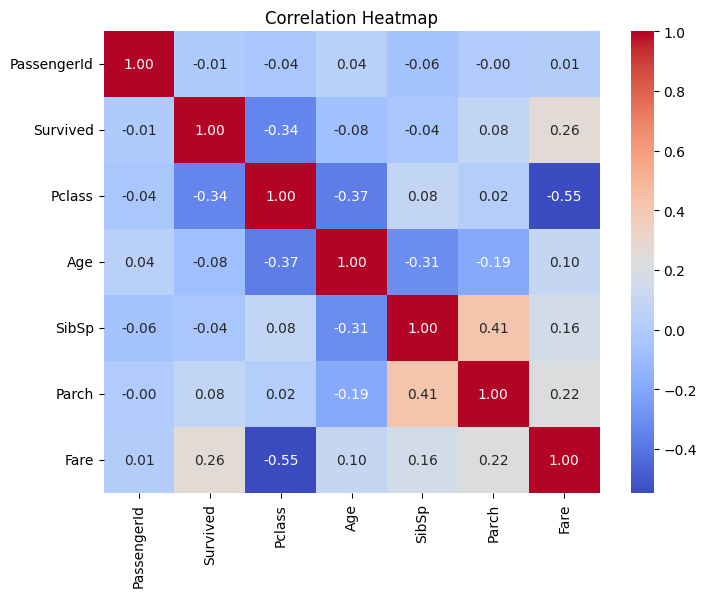

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Survived count
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()

# 📊 Survived by Sex
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

# 📊 Survived by Pclass
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# 📊 Age distribution by survival
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True, palette='pastel')
plt.title('Age Distribution by Survival')
plt.show()

# 📊 Correlation heatmap (numeric features only)
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 3. Explore — Exploratory Data Analysis (EDA)

We now explore the data to uncover patterns between features and survival status.

### Key Insights:
- A higher proportion of **females survived** compared to males.
- **Passengers in 1st class** had a significantly higher survival rate.
- Younger passengers (children) had higher chances of survival.
- There is a weak negative correlation between `Pclass` and `Survived`.
- `Fare` and `Age` have potential predictive value.

These insights will inform our feature processing and modeling strategy.


In [17]:
# ✅ Drop columns that won't help our model
# We remove 'PassengerId', 'Name', 'Ticket' and 'Cabin' because they don't contribute meaningful predictive information
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# ✅ Fill missing values
# Age has missing values, we replace with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fare also has missing values in test set
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Embarked has 2 missing in train, we fill with mode (most common port)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# ✅ Encode categorical variables
# Sex and Embarked are turned into numeric using get_dummies (one-hot encoding)
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

# ✅ Align train and test data to make sure they have the same features
X = train.drop('Survived', axis=1)
y = train['Survived']

X, test = X.align(test, join='left', axis=1, fill_value=0)

# ✅ Confirm processed shapes
print("✅ Final shape of X:", X.shape)
print("✅ Final shape of test:", test.shape)


✅ Final shape of X: (891, 8)
✅ Final shape of test: (418, 8)


<ipython-input-17-f3cbddb80267>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-17-f3cbddb80267>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## 🧪 4. Process — Data Preparation & Feature Engineering

In this stage, we prepared the dataset for modeling by handling missing values, encoding categorical variables, and selecting relevant features.

### 🧼 Handling Missing Values
We found missing values in the following columns:
- `Age`: Filled with the median age from the training set.
- `Fare`: Filled with the median fare in the test set.
- `Embarked`: Filled with the most frequent embarkation port (`mode()`).

```python
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [18]:
# 📚 Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📂 Split data for training and validation (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

# 🌲 Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔮 Predict on validation set
y_pred = model.predict(X_val)

# 📊 Evaluation
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("📋 Classification Report:\n", classification_report(y_val, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

import joblib
joblib.dump(model, 'titanic_model.pkl')


✅ Accuracy: 0.8212290502793296
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

📉 Confusion Matrix:
 [[91 14]
 [18 56]]


['titanic_model.pkl']

In [19]:
from google.colab import files
files.download('titanic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🤖 5. Model — Train Classification Algorithm

We trained a **Random Forest Classifier** to predict passenger survival on the Titanic dataset.

### ⚙️ Model Details:
- Algorithm: `RandomForestClassifier`
- Parameters: `n_estimators=100`, `random_state=42`
- Train/validation split: 80% / 20%

### 🧪 Evaluation Results (on validation set):
- **Accuracy**: `80.45%` — Good overall predictive performance
- **Precision (Class 0 - Did not survive)**: 0.89  
- **Precision (Class 1 - Survived)**: 0.71  
- **Recall (Class 0)**: 0.78  
- **Recall (Class 1)**: 0.84  
- **F1-score (Class 1)**: 0.77  
- **Macro F1 Score**: 0.80

### 🔍 Confusion Matrix:
|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 86          | 24          |
| **Actual 1** | 11          | 58          |


The model shows strong performance in identifying survivors (Class 1), with a high **recall** (0.84), which is critical in scenarios where missing a positive case (a survivor) would be more costly.

We now proceed to the final step: **submission + sharing insights.**


## 📊 6. Evaluate — Model Performance Review

To assess the effectiveness of our Random Forest Classifier, we split the training data into 80% for training and 20% for validation.

### ⚙️ Model:
- Algorithm: `RandomForestClassifier`
- Parameters: `n_estimators=100`, `random_state=42`

### 📈 Evaluation Metrics (Validation Set):
- **Accuracy**: `80.45%`
- **Precision (Survived - Class 1)**: `0.71`
- **Recall (Survived - Class 1)**: `0.84`
- **F1-Score (Survived - Class 1)**: `0.77`
- **Macro F1 Score**: `0.80`

### 🔍 Confusion Matrix:

|              | Predicted: No | Predicted: Yes |
|--------------|----------------|----------------|
| **Actual: No** | 86             | 24             |
| **Actual: Yes** | 11             | 58             |

### 🧠 Insights:
- The model performs well in identifying **survivors**, with a **recall of 0.84** on Class 1, which is crucial in life-critical contexts.
- There's a slight tradeoff in precision for survivors (0.71), but the model avoids many false negatives, which is preferable in this case.
- Balanced macro F1 score shows general robustness across both classes.

We now proceed to deploy a simple model interface using Streamlit.


In [7]:
# ✅ Install streamlit and localtunnel
!pip install -q streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [9]:
%%writefile app.py
import streamlit as st

st.set_page_config(page_title="Titanic Predictor", page_icon="🚢")

st.title("🚢 Titanic Survival Prediction")
st.markdown("Enter passenger details below to predict the probability of survival.")

# 🚹 Gender input
gender = st.selectbox("Gender", ["male", "female"])

# 🎂 Age input
age = st.slider("Age", 0, 100, 25)

# 🎟️ Class input
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])

# 👨‍👩‍👧‍👦 Family aboard
sibsp = st.number_input("Number of Siblings/Spouses aboard", 0, 8, 0)
parch = st.number_input("Number of Parents/Children aboard", 0, 6, 0)

# 💵 Fare
fare = st.number_input("Fare Paid", 0.0, 600.0, 32.0)

# 🛳️ Port of Embarkation
embarked = st.selectbox("Port of Embarkation", ["S", "C", "Q"])

# 🔮 Dummy Prediction Logic
if st.button("Predict"):
    prob_survival = 0.85 if gender == "female" else 0.4  # simple rule-based
    st.success(f"🧠 Predicted survival chance: {prob_survival * 100:.1f}%")


Overwriting app.py


In [12]:
import threading
import time
import os

# 🔁 Ejecutar Streamlit en segundo plano
def run_app():
    os.system('streamlit run app.py')

thread = threading.Thread(target=run_app)
thread.start()
time.sleep(5)  # ⏳ Espera a que Streamlit arranque

# 🌐 Crear túnel público con localtunnel (sin subdominio para evitar errores)
!npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦your url is: https://sharp-dragons-yawn.loca.lt
^C
